In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches # for rectangle
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score # for r²

%matplotlib inline

#setting global plot font, size etc
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('xtick.major', size=8,)
plt.rc('ytick.major', size=8,)
#plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.labelsize"] =14
plt.rcParams["legend.fontsize"] = 11

In [8]:
# log function - a + b* log(x)
def log_func(x,a,b):
    return a + b*np.log10(x) # it should be log10 and not log=ln

#def log_func(x,a,b):
#   return a + b*np.log10(x) # it should be log10 and not log=ln

def exp_func(x, a, b):
    return a*np.exp(b*x)

In [9]:
# case 1 Ms= 2 m, ath/atv = 15

d1 = pd.read_csv("Ms_2m_a_15.csv", nrows = 25)
d1.to_numpy

x = d1["As"]
y = d1["Log_Ar"]
z = d1["Log_Att"]
av = np.log10((d1["Arect"] + d1["Att"])/2)
#d1.tail(5)

In [10]:
# case 2 Ws= 2 m, ath/atv = 15

d2 = pd.read_csv("Ws_2m_a_15.csv", nrows = 25)
d2.to_numpy

x1 = d2["As"]
y1 = d2["Log_Ar"]
z1 = d2["Log_Att"]
av1 = np.log10((d2["Arect"] + d2["Att"])/2)
#d2.tail(5)

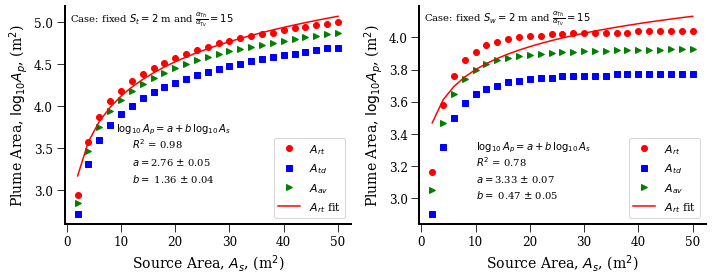

In [11]:
#fit case 1
popt_a,pcov_a = curve_fit(log_func,x,y) # log10 fit overestimate area and obtain fit parameter
pred1_a = log_func(x, popt_a[0], popt_a[1] ) # obtain fit curve log10
r2_a = r2_score(y,pred1_a)

#fit case 2
popt_a1,pcov_a1 = curve_fit(log_func,x1,y1) # log10 fit overestimate area and obtain fit parameter
pred1_a1 = log_func(x1, popt_a1[0], popt_a1[1] ) # obtain fit curve log10
r2_a1 = r2_score(y1,pred1_a1)

#plot

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(x, y, 'or', label = r"$A_{rt}$")
ax[0].plot(x, z, 'sb', label = r"$A_{td}$")
ax[0].plot(x, av, '>g', label = r"$A_{av}$")
ax[0].plot(x, pred1_a, "-r", label=r'$A_{rt}$ fit')


st0 = r"$\log_{10}\, A_p = a + b \, \log_{10}\, A_s$"
st1 = r"$R^2$ = %.2f " %r2_a
st2 = r"$a = $%.2f $\pm$ %.2f" %(popt_a[0], pcov_a[0,0]**0.5)
st3 = r"$b =$ %.2f $\pm$ %.2f" %(popt_a[1], pcov_a[1,1]**0.5)
stt1 = r" Case: fixed $S_t = 2$ m and $\frac{\alpha_{Th}}{\alpha_{Tv}} = 15 $"

ax[0].text(9, 3.7, st0)
ax[0].text(12, 3.5, st1)
ax[0].text(12, 3.3, st2)
ax[0].text(12, 3.1, st3)
ax[0].text(0, 5, stt1)

ax[0].set_xlabel(r"Source Area, $A_s$, (m$^2$)")
ax[0].set_ylabel(r"Plume Area, $\log_{10} A_p$, (m$^2$)")
ax[0].legend();

#plot case 2

ax[1].plot(x1, y1, 'or', label = r"$A_{rt}$")
ax[1].plot(x1, z1, 'sb', label = r"$A_{td}$")
ax[1].plot(x1, av1, '>g', label = r"$A_{av}$")
ax[1].plot(x1, pred1_a1, "-r", label=r'$A_{rt}$ fit')

st4 = r"$\log_{10}\, A_p = a + b \, \log_{10}\, A_s$"
st5 = r"$R^2$ = %.2f " %r2_a1
st6 = r"$a = $%.2f $\pm$ %.2f" %(popt_a1[0], pcov_a1[0,0]**0.5)
st7 = r"$b =$ %.2f $\pm$ %.2f" %(popt_a1[1], pcov_a1[1,1]**0.5)
stt2 = r" Case: fixed $S_w = 2$ m and $\frac{\alpha_{Th}}{\alpha_{Tv}} = 15 $"

ax[1].text(10, 3.3, st4)
ax[1].text(10, 3.2, st5)
ax[1].text(10, 3.1, st6)
ax[1].text(10, 3.0, st7)
ax[1].text(0, 4.1, stt2)

ax[1].set_xlabel(r"Source Area, $A_s$, (m$^2$)")
ax[1].set_ylabel(r"Plume Area, $\log_{10} A_p$, (m$^2$)")
ax[1].legend();

fig.tight_layout()
fig.savefig("fig3.pdf", dpi = 300)